In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib
%matplotlib inline

In [3]:
import sys
sys.path.append("C:\\Users\\eber373\\\Desenvolvimento\\\Projects-Python\\\CoreMS")

from pathlib import Path

from PySide2.QtWidgets import QFileDialog, QApplication
from PySide2.QtCore import Qt

from corems.mass_spectrum.input.massList import ReadMassList
from corems.molecular_id.search.priorityAssignment import OxygenPriorityAssignment
from corems.mass_spectrum.factory.classification import HeteroatomsClassification, Labels 

# Load data

### Get the full path of the file using Pyside2 
Install Pyside2 separately. It is not a requirement from CoreMS, therefore you need to install it using:
- pip install PySide2, or
- pip3 install PySide2, or
- python -m install PySide2

In [4]:
app = QApplication(sys.argv)

In [5]:
file_dialog = QFileDialog()
file_dialog.setWindowFlags(Qt.WindowStaysOnTopHint)

file_location = file_dialog.getOpenFileName()[0]
app.quit()

### Load the mass spectrum data from a text mass list in centroid mode (default behaviour)

In [6]:
mass_spectrum = ReadMassList(file_location).get_mass_spectrum(polarity=-1)
print(mass_spectrum)

### Mass spectrum vizualization

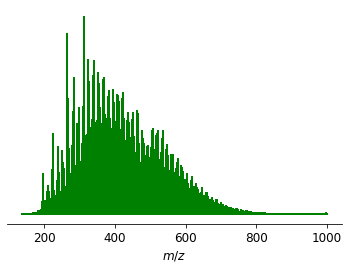

In [7]:
mass_spectrum.plot_centroid()

# Molecular formula assigment using oxygen prioritization approach
The oxygen priority assignment algorithm automatically finds the best oxygen series across a broad m/z range (for each m/z 14 Da) and use this series as the reference for a top-down priority assignment. 
The steps are: 
1. Sets Kendrick base to C1H2O1
2. Noise removal using Kendrick filter using DBSCAN
3. Identify the most abundant peak 
4. Search for molecular formulae candidates of classes Oo, then SsOo, NnOo, 
5. Stop the search on the first candidate found
6. "Walks" in 14 Da increments in ascending and descending m/z order, pick the most abundant peak, and repeat steps 3, 4, and 5.
7. Sort the identified series by reverse order of peak height
8. Use heteroatom class order for an assignment of all peaks
9. Look for non-oxygen classes, i.e Nn, NnSs


### Mass error settings

In [8]:
mass_spectrum.molecular_search_settings.error_method = 'None'
mass_spectrum.molecular_search_settings.min_mz_error = -1.0
mass_spectrum.molecular_search_settings.max_mz_error = 1.0

### Available methods for best molecular formula candidate selection

In [9]:
mass_spectrum.molecular_search_settings.score_methods

['S_P_lowest_error',
 'N_S_P_lowest_error',
 'lowest_error',
 'prop_score',
 'air_filter_error',
 'water_filter_error',
 'earth_filter_error']

### Selection of best molecular formula candidate method

In [10]:
mass_spectrum.molecular_search_settings.score_method = "N_S_P_lowest_error"

### Settings for molecular formulae assigment

In [11]:
mass_spectrum.molecular_search_settings.usedAtoms['C'] = (1,90)
mass_spectrum.molecular_search_settings.usedAtoms['H'] = (4,200)
mass_spectrum.molecular_search_settings.usedAtoms['O'] = (0,20)
mass_spectrum.molecular_search_settings.usedAtoms['N'] = (0,0)
mass_spectrum.molecular_search_settings.usedAtoms['S'] = (0,0)
mass_spectrum.molecular_search_settings.usedAtoms['Cl'] = (0,1)

mass_spectrum.molecular_search_settings.isProtonated = True
mass_spectrum.molecular_search_settings.isRadical= False
mass_spectrum.molecular_search_settings.isAdduct = True

mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = 30

### Run oxygen priority assignment algorithm 

In [12]:
OxygenPriorityAssignment(mass_spectrum).run()


Estimated number of clusters: 1
Estimated number of noise points: 873
Start most abundant mass spectral peak search
Maximum abundance limit  = 222440397.72138754 and max abundance kendrick cluster = 546416064.0
Searching molecular formulas
Querying database for existing classes
Finished querying database for existing classes

Started molecular formula table generation
Finished molecular formula table generation

Started molecular formula table generation
Finished molecular formula table generation

Finished searching molecular formulas
Select most abundant peak with molecular formula =  C14 H9 O9 with a m/z error of None ppm
Started mass spectral peak series search
min_mz 138.31860980000002
max_mz 876.1233318
Querying database for existing classes
Finished querying database for existing classes

Started molecular formula table generation
Finished molecular formula table generation

Started molecular formula table generation
Finished molecular formula table generation

Querying database

### Molecular Formula Statistics

In [13]:
mass_spectrum.percentile_assigned()

6396 peaks assigned and 15522 peaks not assigned , total  = 29.18 %, relative abundance = 76.96 %


(6396, 15522, 29.181494661921707, 76.96483987418618)

# HeteroatomsClassification

In [14]:
mass_spectrum_by_classes = HeteroatomsClassification(mass_spectrum)

### Mass spectrum Assigned vs Unassigned

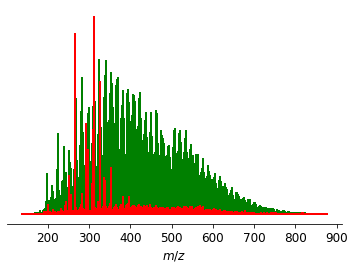

In [15]:
mass_spectrum_by_classes.plot_ms_assigned_unassigned()

### Mass spectrum for each individual heteroatomic classes

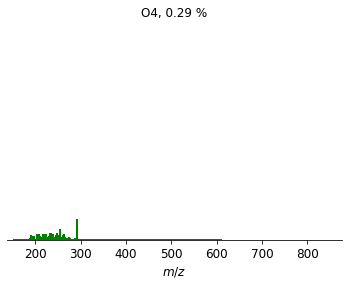

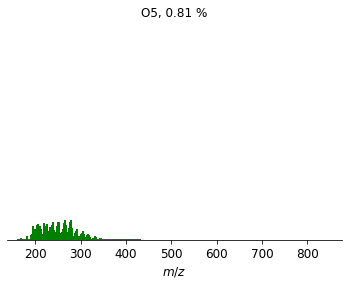

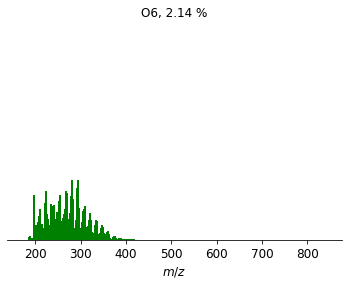

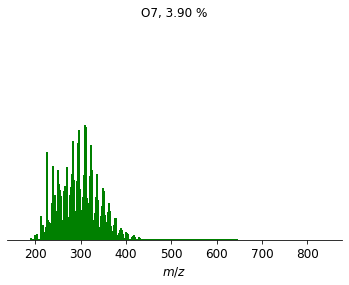

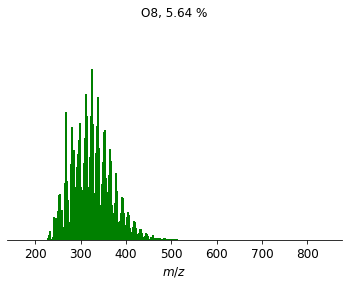

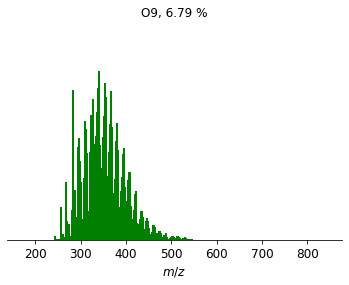

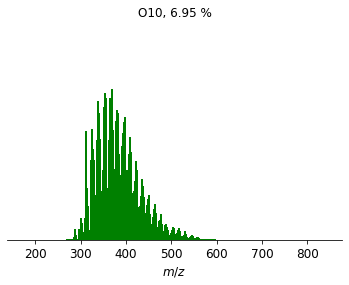

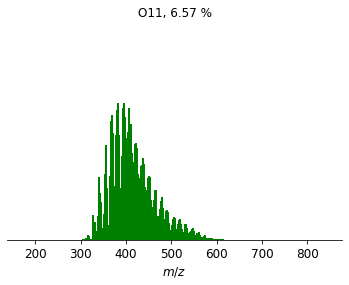

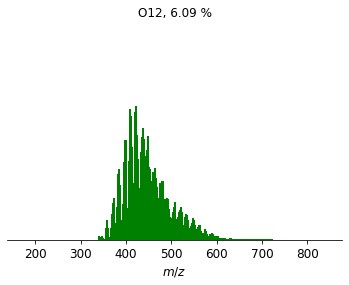

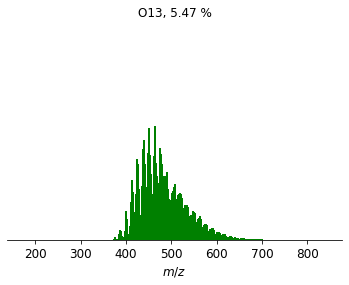

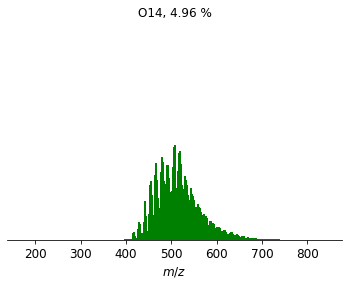

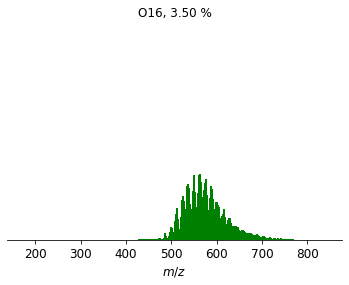

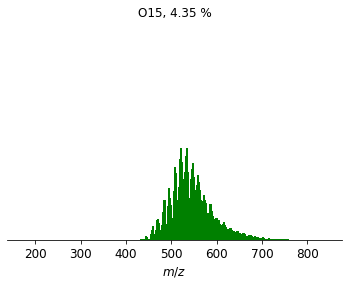

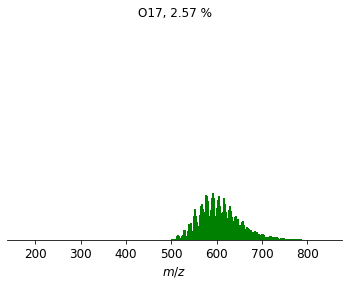

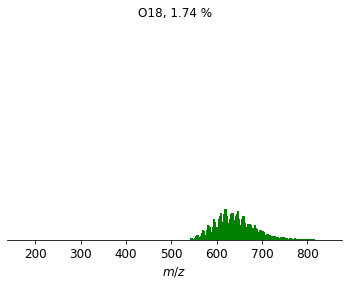

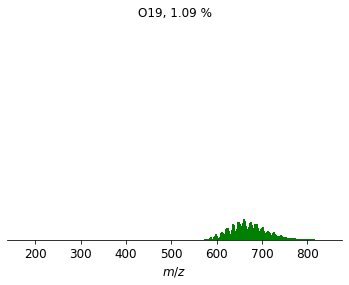

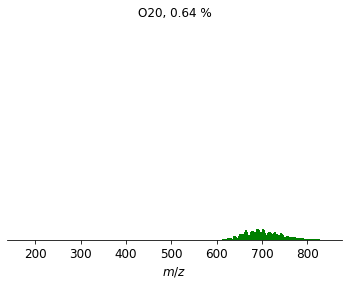

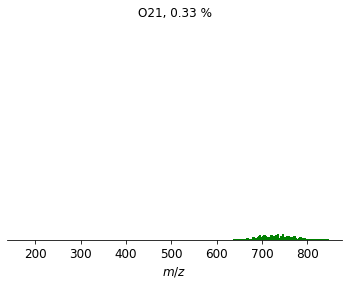

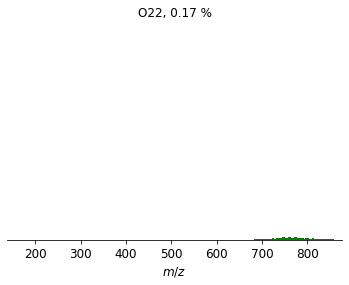

In [16]:
for classe in mass_spectrum_by_classes.get_classes(threshold_perc=0, isotopologue=False):
            
        mass_spectrum_by_classes.plot_ms_class(classe)
        matplotlib.pyplot.show()

### Individual DBE vs. Carbon number diagram plots 

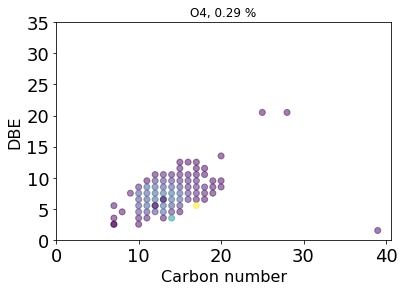

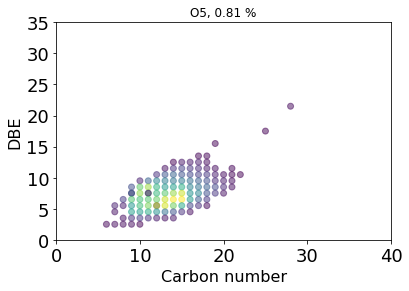

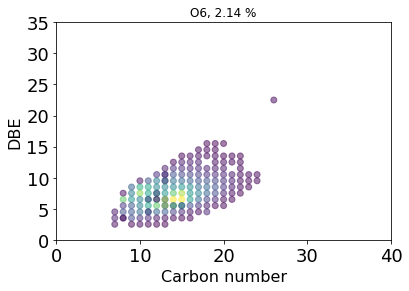

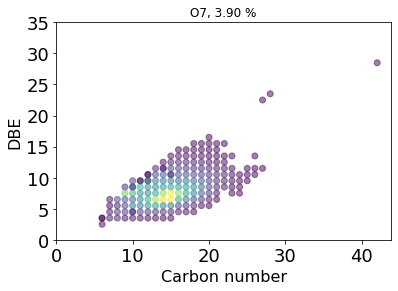

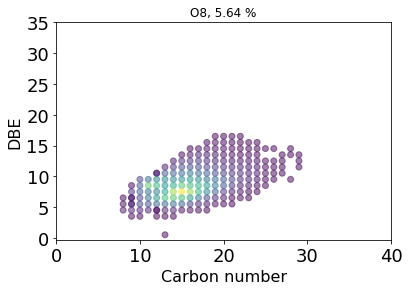

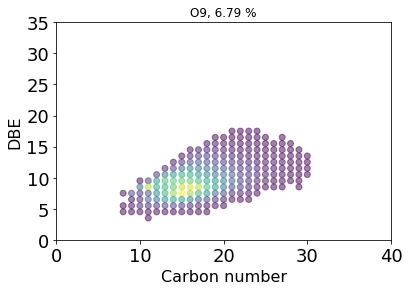

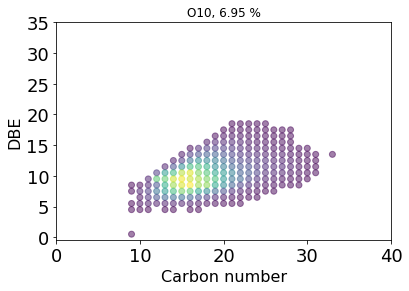

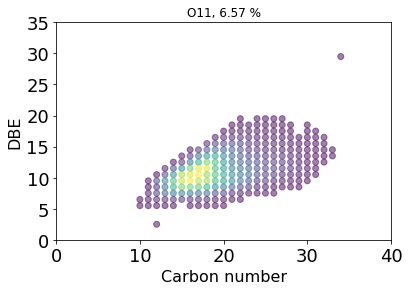

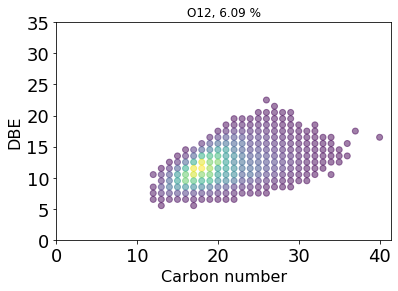

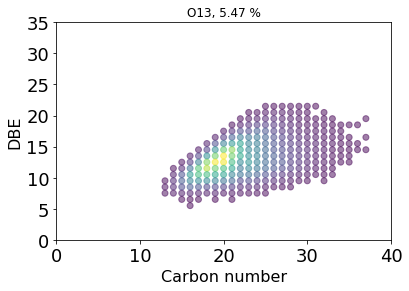

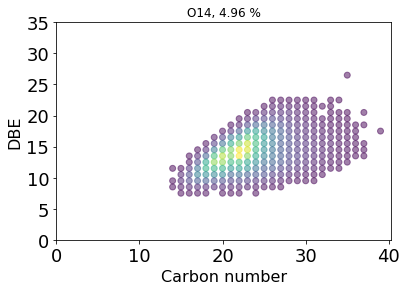

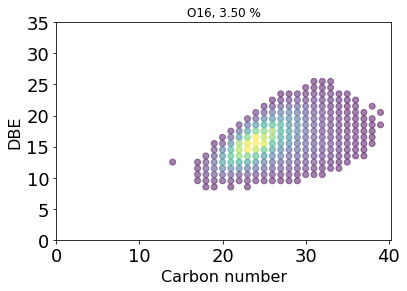

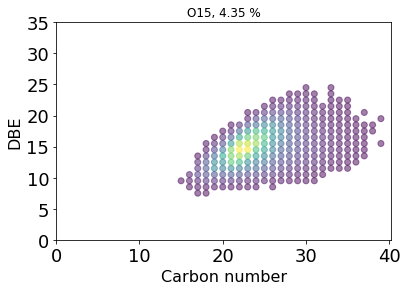

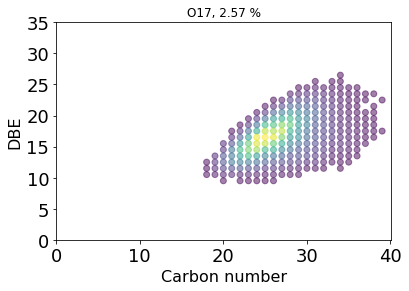

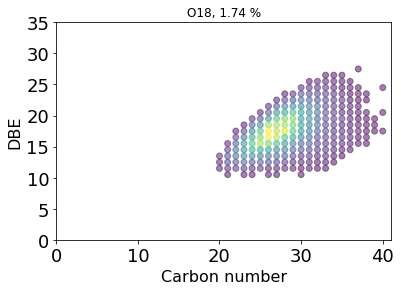

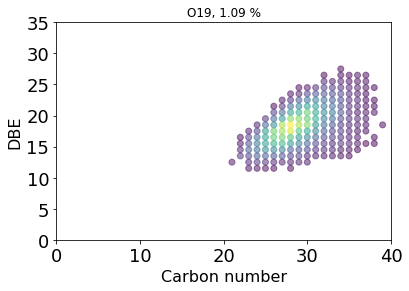

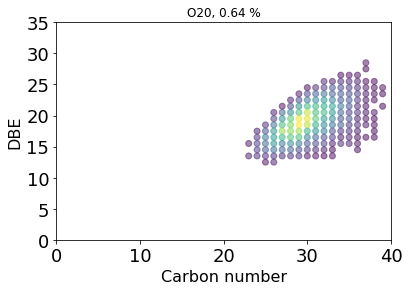

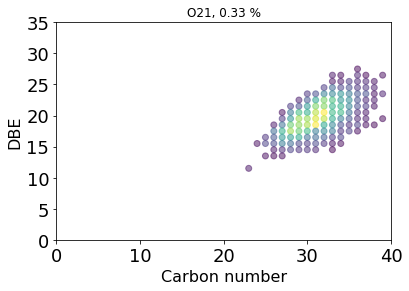

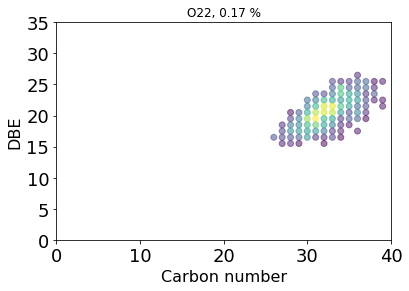

In [19]:
for classe in mass_spectrum_by_classes.get_classes(threshold_perc=0, isotopologue=False):
            
        mass_spectrum_by_classes.plot_dbe_vs_carbon_number(classe)
        matplotlib.pyplot.show()

# Export data to CSV 
No need to change the filename suffix, the function "to_csv()" convert the suffix to .csv automatically

In [18]:
output_file = file_location.split(".txt")[0]

output_file = output_file + "_Oxygen_Priority_lowest_error_score"

print(output_file)

mass_spectrum.to_csv(output_file)

C:/Users/eber373/Desktop/Data/20190709_WK_CADY_Auto_SRFA_QC_O40_1_01_71_Oxygen_Priority_lowest_error_score
